<div style="border:solid Purple 2px; padding: 40px">

<b>Привет, Лилия!👋

Меня зовут Эльвира, я буду ревьюером твоего проекта. Предлагаю общаться на «ты», но если это не удобно - дай мне знать, и мы перейдем на «вы».


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Такими комментариями я буду помечать отлично проделаную работу😉
</div>
    
<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
В таких комментариях я постараюсь подсказать тебе более элегантное или легкое решение, некоторые хитрости и фишки. Части проекта, помеченные такими комментариями, можно не исправлять, но рекомендую обратить на них внимание.</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
    
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Если ты видишь такой комментарий, значит здесть есть недочет, который следует исправить.
</div>

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница🙃
    
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Чтобы сделать подобный блок, кликни здесь дважды и скопируй всю предыдущую строку ;)
    
Пожалуйста, не удаляй и не перемещай мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.</div></b>

Описание данных
Данные для первой части
Файл /datasets/hypothesis.csv. Скачать датасет
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


Название проекта: Анализ гипотез для увеличения выручки интернет магазина.

Как аналитику крупного интернет-магазина перед нами стоит задача. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Нам предстоит провести приоритезацию гипотез, запустить A/B-тест и проанализировать результаты.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Очень здорово, что ты начинаешь проект с такого подробного введения, так держать!
</div>

Приоретизация гипотез

Импортируем все необходимые библиотеки

In [40]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.


In [41]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [42]:
data.columns = data.columns.str.lower()

Проведем приоритезацию гипотез с помощью фреймворка ICE (умножаем значимость для пользовательского опыта impact на нашу уверенность в этом confidence и делим на цену уровень стоимости проверки efforts)

In [43]:
data['ICE'] = round (data['impact']*data['confidence']/data['efforts'], 2) # рассчитываем ICE, результат записываем в отдельный столбец
pd.set_option('max_colwidth', 150) # увеличиваем максимальную ширину столбца, чтобы была возможность прочесть гипотезы полностью
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)) # выводим на экран гипотезы в порядке приоритезации по ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Теперь воспользуемся фреймворком RICE. При использовании этого фреймворка в множители числителя добавляем значение оценку количества пользователей, которых затронут изменения reach

In [44]:
data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts'] # рассчитываем RICE, результат записываем в отдельный столбец
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)) # выводим на экран гипотезы в порядке приоритезации по RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Для наглядности выведем рядом очередность приоритезации гипотез разными фреймворками

Результаты несколько разнятся. Это связано с тем, что RICE учитывает оценку количества пользователей, которых затронут изменения и чем их больше, тем приоритет гипотезы выше. Для ICE этот критерий не учитывается.

Стоит отметить, что в обоих случаях можно выделить приоритетными гипотезы под номерами 7, 0, 6. Несмотря на то, что их приоритет разнится при оценке разными фреймворками, в обоих случаях они вверху нашего "рейтинга". Гипотезы же 4, 5, 3, 1 в обоих случаях имеют низкий приоритет.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Приоритизация гипотез проведена успешно! Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймоврков, так различия в их работе будут максимально наглядными. Согласна с твоими выводами по поводу их различия.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
<s>
Обрати внимание, что, на самом деле - мы выводим не номер, а индекс гипотезы в конкретном файле. Если такой вывод передать коллегам, то у них под этими номерами могут быть иные гипотезы. Поэтому следует указать полное название гипотез в выводах.

<div class="alert alert-info"> <b></b> Итак, гипотезы, которые необходимо озвучить, чтобы передать коллегам при анализе данных.
 
</div>

<div class="alert alert-info"> <b></b> 
 Приоритетными отмечаю гипотезы: 
    7-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    0-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    6-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
    
</div>

<div class="alert alert-info"> <b></b> Однако, в обоих случаях имеет самый низкий приоритет следующие гипотезы:
    4-Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей;
    5-Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
    3-Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
    1-Запустить собственную службу доставки, что сократит срок доставки заказов.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Теперь все отлично)

Анализ А/В теста

Предобработка

Для начала запишем данные из имеющихся датафреймов в переменные orders и visitors соответственно и посмотрим как выглядят таблицы.

In [45]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [46]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Приведем тип данных в столбцах date в обоих датафреймах к типу datetime

In [47]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверяем корректность разделения пользователей по группам.

In [48]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

58

Получается 58 пользователей попали в обе группы. Это может исказить выводы дальнейшего исследования, поэтому от записей о покупках этих пользователей придется избавиться

In [49]:
# перезаписываем orders
orders = orders.query('visitorId not in @group_intersections')

Проверим, что в данных не осталось записей о пользователях попавших в обе группы

In [50]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

0

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что проверяешь пользователей на пересечение по группам)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
    <s>
Мы пропустили один важный шаг предобработки - проверка на дубликаты, давай добавим)

<div class="alert alert-info"> <b></b> Добавляю проверку на дубликаты</div>


In [51]:
orders.duplicated().sum()

0

In [52]:
visitors.duplicated().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

👍

Дубликаты не обнаружены

Чтобы построить графики, нужно собрать кумулятивные данные. Создадим датафрейм cumulativeData со столбцами:

date — дата;
group — группа A/B-теста (A или B);
orders — кумулятивное количество заказов на указанную дату в указанной группе;
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.
Для этого вначале подготовимся.

In [53]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец group не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков

Применим методы к каждой строке датафрейма и отсортируем результаты по столбцам date и group.

Результат запишем в датафрейм ordersAgregated

In [54]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично visitorsAggregated

In [55]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Таким образом в ordersAggregated и visitorsAggregated будут находиться такие данные как будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблиц.

In [56]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Можно проверить, корректно ли был содан датафрейм cummulativeData. Например, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных. </div>  

График кумулятивной выручки по группам

In [57]:
# параметры визуализации
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(20,7)})

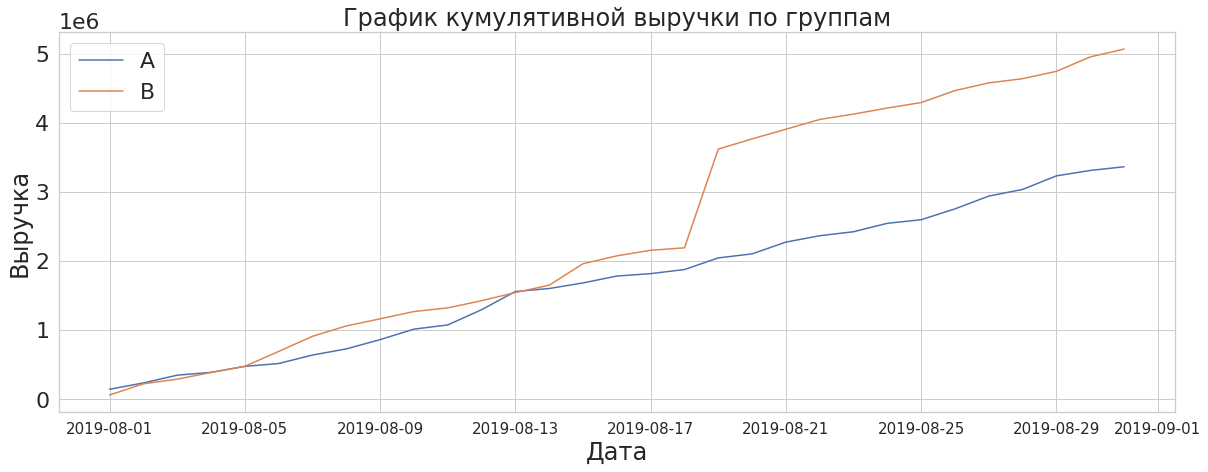

In [58]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси х
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();


Вывод:

выручка стабильно растет на протяжении всего теста в обоих группах;
в начале теста метрика немного колеблется, но показывает близкие значения в обоих группах;
у группы B наблюдается резкий всплеск после 17.08, который может быть связан с резким увеличением заказов в этот день, либо о появлении очень дорогих заказов в выборке;
после выброса в группе B выручки в обоих группах стабилизируются и растут практически одинаково.
Однозначно утверждать, что группа B лучше на данном шаге нельзя.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
  
Верно)

График кумулятивного среднего чека по группам.
Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

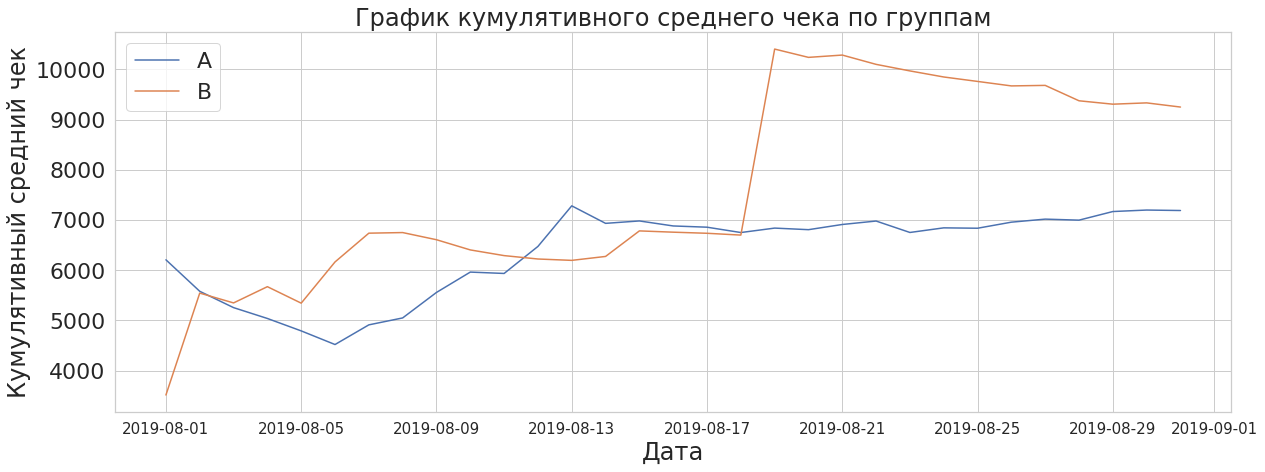

In [59]:
# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.legend();


Вывод:

В целом к концу теста метрика стабилизируется в обоих группах.
Группа А, в отличии от группы В более равномерна, к концу теста средний чек почти сравнялся с максимальным значением, достигнутым 13 августа.
Выделяется аномальный рост среднего чека 18-19 августа по группе В, а затем снижение. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне;

График относительного изменения кумулятивного среднего чека группы В к группе А.
Построим график относительного различия для среднего чека.

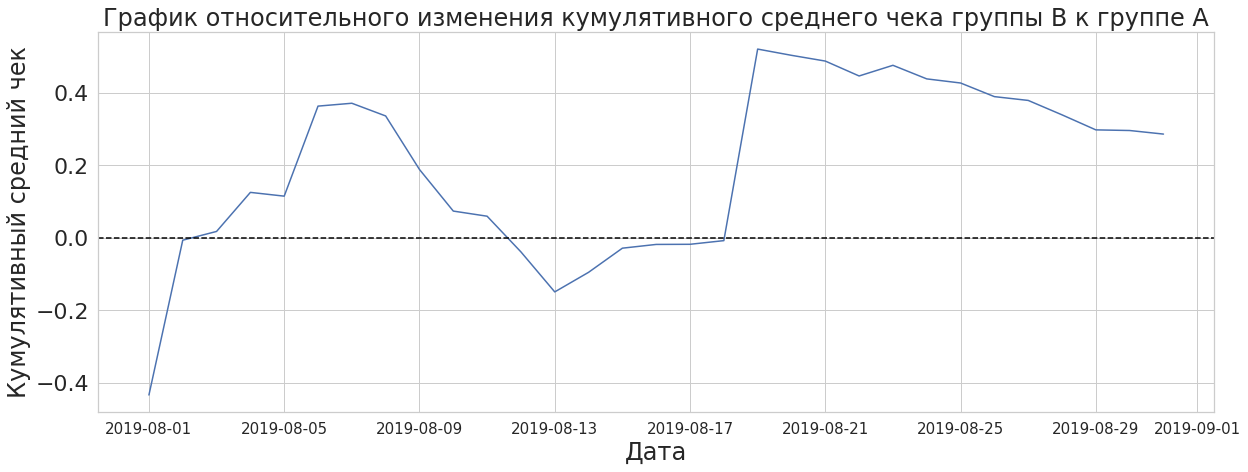

In [60]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек');


Вывод:

В начале теста лучше себя чувствовали показатели группы B, затем они стали ухудшаться относительно А
Ближе к середине теста 13.08 А достигает своих лучших показателей, поэтому график опускается в худшую за время теста для B точку
Однако важно отметить, что на графике различия между сегментами резко «скачет» в некоторых днях, например 05.08 или 08.08, но особенно выделяется, конечно скачок 18.08. Очевидно есть выбросы.
После выброса метрика снижается и стремится стабилизироваться.

График кумулятивной конверсии по группам
Теперь посмотрим на кумулятивную конверсию

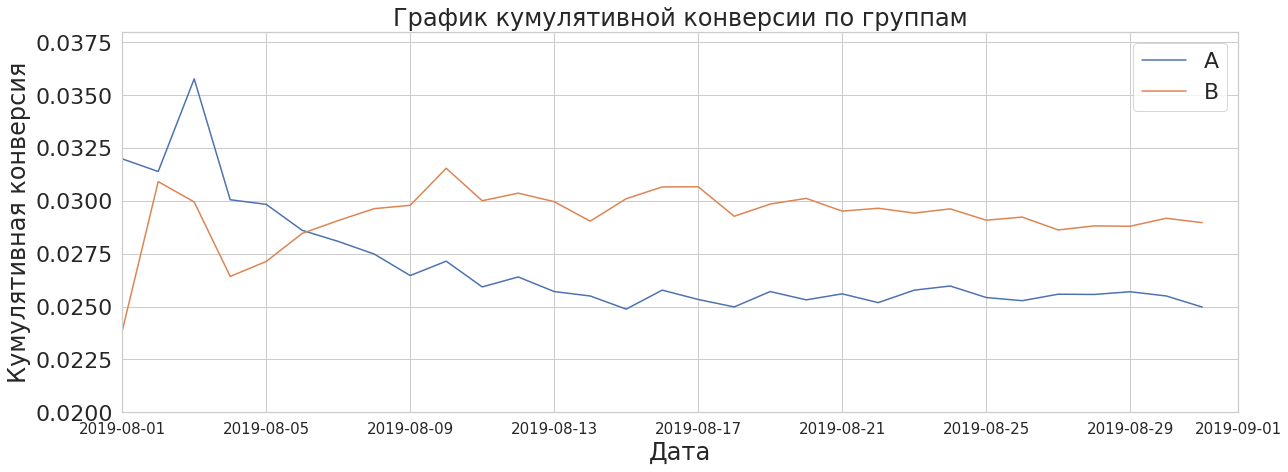

In [61]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.020, 0.038])

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');


Вывод:

В начале теста наблюдаем заметные колебания. В начале конверсия у группы А была больше группы B, но уже к концу первой недели тестирования конверсия группы В выросла, а группы А снизилась, после чего графики начали стремиться к стабилизации
К 11-12 августа различие в конверсии у обоих групп становится очевидно, и начинает фиксироваться.
Примерно к 20 августа колебания максимально сглаживаются
В целом, конверсия у группы В стабильно лучше по накопленным показателям чем A

График относительного изменения кумулятивной конверсии группы В к группе А
Построим график относительного изменения кумулятивных конверсий

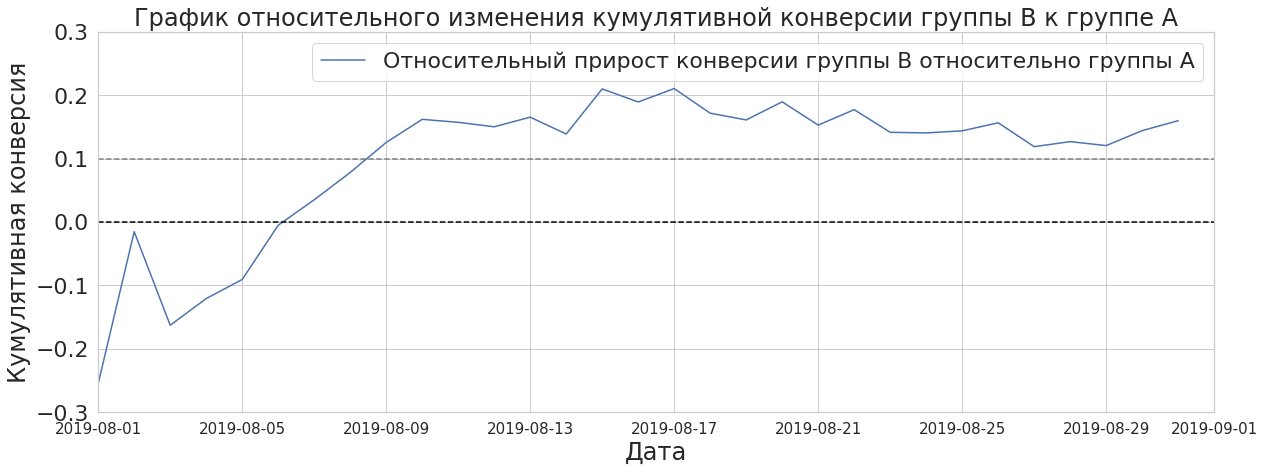

In [62]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');


Вывод:

C самого начала теста, метрика группа В меньше группы А, но с 6 августа вырвалась вперед и стабильно росла до своего пика 15.08 в 21%, далее метрика начинается снижаться и стремиться к стабилизации.

В целом отношение конверсии стремится примерно к уровню 13-17% в пользу B, но в последние дни теста еще растет. Скорее всего отношение конверсии еще полностью не установилось, и сейчас делать какие-либо однозначные выводы по тесту еще нельзя, но на первый взгляд B выглядит интереснее в плане конверсии.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Графики построены и интерпретированы верно, молодец)
</div>

Точечный график количества заказов по пользователям
Для начала посмотрим топ количества заказов в табличном виде

In [63]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Теперь построим точечный график количества заказов по пользователям

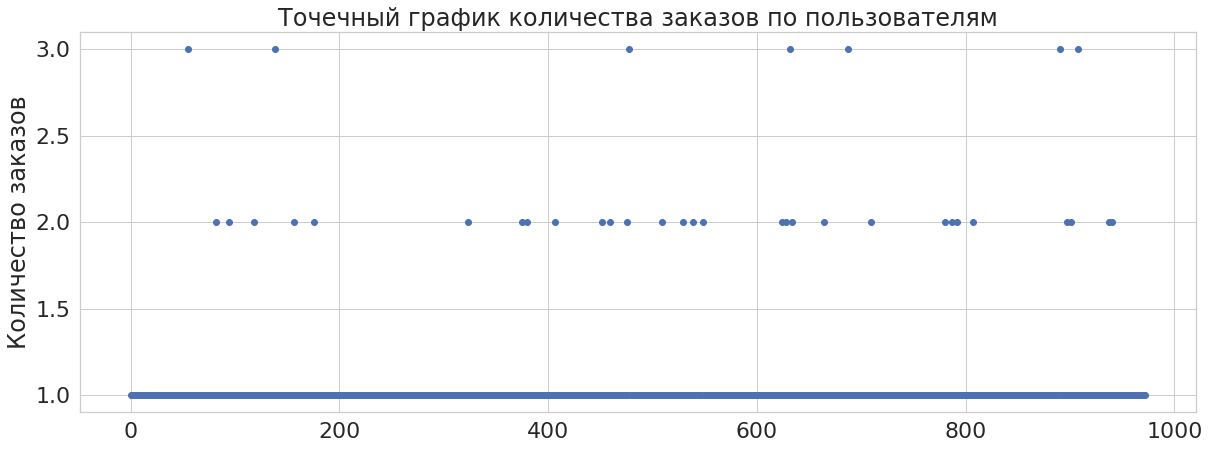

In [64]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

Вывод:

Есть пользователи, которые совершали по 1, 2, 3 заказов. Чаще всего 1 заказ, не редки случаи и 2-х заказов. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Для этого необходимо посчитать выборочные перцентили количества заказов на одного пользователя.

Посчитаем выборочные 95-й и 99-й перцентили количества заказов на одного пользователя

In [65]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Вывод:

Не более 5% пользователей оформляли больше чем один и не более 1% пользователей - больше двух заказов. Целесообразно выбрать 1 заказ на одного пользователя за нижнюю границу "нормального" числа заказов, и отсеять аномальных пользователей.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Использовать 95% перцентиль для отсечения выбросов - возможный вариант. Но в данном случае лучше использовать 99% перцентиль. Мы фильтруем по двум параметрам. А значит при последовательном отсечении 5%, мы отбросим больше 5%, а это не очень хорошо.

Точечный график стоимости заказов
Для начала посмотрим в табличном виде топ по стоимости заказов

In [66]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


даже в этой таблице уже виден пользователь из группы B, который скорее всего и стал причиной аномального всплеска, потратив 1 294 500 рублей

Теперь построим точечный график

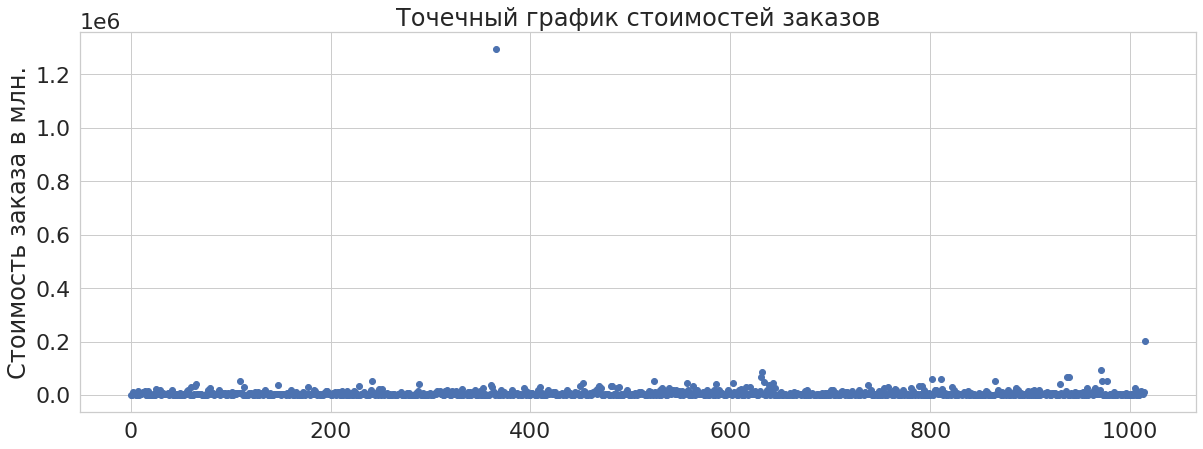

In [67]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.');

Вывод:

На графике зафиксирован один самый крупный заказ на сумму 1 294 500. Далее виден заказ в размере 202 740 Все остальные заказы ниже 92 550. Для того, чтобы точно определить стоимость заказа, которую следует считать аномальной посчитаем выборочные перцентели.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
Можно добавить еще один график, ограничив значения по оси Y. Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов.

Посчитаем выборочные 95-й и 99-й перцентили стоимости заказов

In [68]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Вывод:

Не более, чем у 5% пользователей чек дороже 26 785, и только не более 1% пользователей оформили на чек дороже 53 904. Границей для определения аномальных заказов следует обозначить до 26 785.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Хорошая работа по определению границ аномальных значений)


Cтатистическая значимость различия в конверсии между группами по "сырым" данным.
Перед тестом Манна-Уитни проверим гипотезу о нормальном распределении с помощью критерия Шапиро-Уилка:

{H0:Конверсии группы A распределены нормально H1:Конверсии группы A не распределены нормально
 
α=5% критический уровень статистической значимости.

Аналогично для группы B.

In [69]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# зададим уровень значимости 5%
alpha=0.05
p=st.shapiro(sampleA)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределении группа А')
else:
    print('Отклонить гипотезу о нормальности распределении группа А')
    
p=st.shapiro(sampleB)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределении группа В')
else:
    print('Отклонить гипотезу о нормальности распределении группа В')

Shapiro-Wilk normality test, W-statistic: 0.132646, p-value: 0.000000
Отклонить гипотезу о нормальности распределении группа А
Shapiro-Wilk normality test, W-statistic: 0.150587, p-value: 0.000000
Отклонить гипотезу о нормальности распределении группа В


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


так данные в обоих группах данные не подходят под нормальное распределение, поэтому воспользуемся U-критерием Манна — Уитни

{H0:Конверсии групп A и B равны, статистически значимых отличий нет H1:Конверсии групп A и B различны, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

Применим тест U-критерий Манна — Уитни

In [70]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.2f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.16


Вывод:

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что конверсии равны и статистически значимых различий в конверсии между группами нет отвергаем. Конверсии различаются значимо.
Относительный проигрыш группы A составляет 16%

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
Гипотезы сформулированы верно и значение p-value интерпретировано правильно. Хорошая работа.
</div>

Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
{H0:Средние чеки групп A и B равны, статистически значимых отличий нет H1:Средние чеки групп A и B различны, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

In [71]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.29


Вывод:

Первое число — p-value = 0.829 значительно больше 0.05. Значит, нулевую гипотезу о том, что средние чеки равны и статистически значимых различий между группами в размере среднего чека нет принимаем.
При этом средний чек группы B значительно выше чем у А, почти на 29%, но тут свою роль могли сыграть выбросы, проверим это далее на очищенных данных

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Верно)

Статистическая значимость различий в конверсии между группами по «очищенным» данным.
Как мы определились ранее, за аномальных пользователей примем тех, кто совершил более 1 заказа или совершил заказ дороже 26 785 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 26 785 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [72]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
86


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Чтобы в дальнейшем мы могли использовать анализ повторно, будет лучше отказаться от  ручного ввода обозначаемых границ, и заменить на соответствующие коду обозначения (перцентили))

</div>

Получаем 86 аномальных пользователя, проверим как они повлияли на результат теста.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

{H0:Конверсии групп A и B равны, статистически значимых отличий нет H1:Конверсии групп A и B различны, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

In [73]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим тест U-критерий Манна — Уитни

In [74]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.2f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.17


Вывод:

Результаты по конверсии значимо не изменились. p-value стал чуть больше на 0,005, что никак не меняет наших выводов. Проигрыш группы A на очищенных данных немного увеличился 17% против 16% на сырых

Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
{H0:Средние чеки групп A и B равны, статистически значимых отличий нет H1:Средние чеки групп A и B различны, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

In [75]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.03


Вывод:

p-value уменьшился почти на 0.1, но по прежнему значительно выше 0,05
Особенно нужно обратить внимание на разницу между средним чеком. Она упала с 29% в пользу B до 3% в пользу A! Это еще раз заставляет убедиться, что статистически значимых различий по этой метрике между группами нет, а наблюдаемая на неочищенных данных разница как мы и предполагали была связана с выбросами.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Статистический анализ проведен верно)

Вывод
Резюмируем имеющиеся факты:

есть статистически значимые различия по конверсии между группами (как по сырым так и по очищенным данным), при этом преимущество у группы B порядка 16-17%;
нет статистически значимых различий по среднему чеку между группами (как по сырым так и по очищенным данным);
график различия конверсий между группами показывает, что результаты группы B лучше группы A в конце исследования приблизительно на 13-17%, при этом есть тенденция к еще небольшому улучшению;
график различий кумулятивного среднего чека говорит нам о преимуществе группы B только из - за выброса, после чего метрика начинает снижаться к более естественному положению
Исходя из обнаруженных фактов тест следует остановить и признать его успешным в части улучшения конверсии в целевой группе B В части среднего чека нельзя утверждать, что какая - либо из групп имеет преимущество над другой. Оснований полагать, что при продолжении теста разница между группами в конверсиях либо среднем чеке значимо изменятся нет, т.к. колебания в графиках носят затухающий характер.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Правильно)

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_2<a class="tocSkip"> </h2>
    <br/>
Лилия, спасибо за проект! Успехов в дальнейшем обучении!)
    

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
Лилия, ты хорошо поработала по проекту, отлично справилась с расчетами)
    
Необходимо доработать:
    
* Указать гипотезы
* Дубликаты
* Остальные комментарии ты найдешь в работе
    
 
**Желаю удачи и жду твой проект на повторное ревью! Если вдруг у тебя возникнут вопросы, то я с радостью отвечу на них.    😊**
    
![gif](https://i.gifer.com/378.gif)
    
<br>   
             
**Дополнительные материалы:**
 
[Вебинары под эгидой Практикума](https://vk.com/yandex.praktikum?w=wall-176471180_2144), 
    
[Лекции Анатолия Карпова 1](https://www.youtube.com/watch?v=jnFVmtaeSA0&list=WL&index=19&t=2s) [2](https://www.youtube.com/watch?v=gljfGAkgX_o&list=WL&index=4)
    
Материалы [gopractice](https://gopractice.ru/summary/)

Лекцию Карта статистических методов [Смотреть видео](https://www.youtube.com/watch?v=-zps6hm0nX8&t=1269s)
        
</div>